<a href="https://colab.research.google.com/github/gibsonmarsh/Ford/blob/main/project_1_part_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=IBM&apikey=demo'
r = requests.get(url)
data= r.json()
stock=pd.DataFrame.from_dict(data["Monthly Adjusted Time Series"], orient="index")
stock.reset_index(inplace=True)
stock.rename(columns={"1. open": "open","2. high": "high", "3. low":"low", "4. close": "close", "5. adjusted close": "adjusted", "6. volume": "volume", "7. dividend amount":"dividend amount", "index":"date"},inplace=True)
stock["ticker"]="IBM"
stock.head()

,date,open,high,low,close,adjusted,volume,dividend amount,ticker
0,2022-03-31,122.6700,133.0800,120.7000,130.0200,130.0200,96447210,0.0000,IBM
1,2022-02-28,133.7600,138.8200,118.8100,122.5100,122.5100,98492968,1.6400,IBM
2,2022-01-31,134.0700,142.2000,124.1930,133.5700,131.9493,147238382,0.0000,IBM
3,2021-12-31,118.2500,134.9900,116.5600,133.6600,132.0382,113930079,0.0000,IBM
4,2021-11-30,125.0500,127.2900,114.5600,117.1000,115.6791,119252012,1.6400,IBM


In [ ]:
def stock(ticker=True):
  url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=IBM&apikey=demo'+ticker+"&apikey=EH4PMAULA99TO10X"
  #print[url] 
  r = requests.get (url)
  data= r.json()
  stock=pd.DataFrame.from_dict(data["Monthly Adjusted Time Series"], orient="index")
  stock.reset_index(inplace=True)
  stock.rename(columns={"1. open": "open","2. high": "high", "3. low":"low", "4. close": "close", "5. adjusted close": "adjusted", "6. volume": "volume", "7. dividend amount":"dividend amount", "index":"date"},inplace=True)
  stock["ticker"]=ticker
  return stock

In [ ]:
stock(ticker="A")

,date,open,high,low,close,adjusted,volume,dividend amount,ticker
0,2022-03-31,122.6700,133.0800,120.7000,130.0200,130.0200,96447210,0.0000,A
1,2022-02-28,133.7600,138.8200,118.8100,122.5100,122.5100,98492968,1.6400,A
2,2022-01-31,134.0700,142.2000,124.1930,133.5700,131.9493,147238382,0.0000,A
3,2021-12-31,118.2500,134.9900,116.5600,133.6600,132.0382,113930079,0.0000,A
4,2021-11-30,125.0500,127.2900,114.5600,117.1000,115.6791,119252012,1.6400,A
...,...,...,...,...,...,...,...,...,...
263,2000-04-28,120.0000,128.0000,101.2500,111.5000,63.8867,168464800,0.0000,A
264,2000-03-31,102.0000,128.2500,99.5000,118.3700,67.8230,194329000,0.0000,A
265,2000-02-29,112.3700,119.7500,100.9400,102.7500,58.8732,133524400,0.1200,A
266,2000-01-31,112.4400,124.7500,109.6200,112.2500,64.2515,175259600,0.0000,A


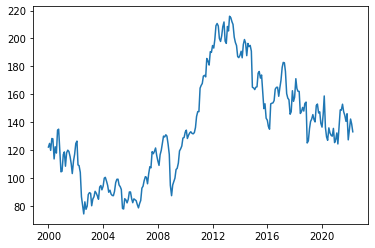

In [ ]:
stocks=stock(ticker="A")
stocks['date']=pd.to_datetime(stocks['date'])
stocks.dtypes
column_names=stocks.columns
for i in column_names[1:8]:
  stocks[i]= stocks[i].astype('float')
plt.plot(stocks['date'],stocks['high'])